In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from embedding.data_load import DATA_FRAME, SIMPLE_TITLE
from embedding.data_preparation import build_vocab, create_index_frame
from embedding.embedding_model import initialize_embedding, train_embeddings

In [2]:
vocab = build_vocab(DATA_FRAME['clean_tags'], DATA_FRAME['clean_title'])
index_df = create_index_frame(vocab, DATA_FRAME)

In [3]:
SIMPLE_TITLE = SIMPLE_TITLE.apply(lambda x: [x])
SIMPLE_FRAME = pd.DataFrame({'clean_title': SIMPLE_TITLE.values, 'clean_title_1': SIMPLE_TITLE.values})

In [4]:
simple_vocab = build_vocab(SIMPLE_TITLE)

In [5]:
simple_ind = create_index_frame(simple_vocab, SIMPLE_FRAME, train_col='clean_title', target_col='clean_title_1')

In [7]:
initial_matrix = initialize_embedding(simple_vocab, dimension=100, variance=0.05)

In [8]:
trained_embeddings = train_embeddings(simple_ind, 
                                      initial_matrix, 
                                      vector_method='avg', 
                                      descent_type='rmsprop', 
                                      update_rate=0.85, 
                                      num_iterations=10000,
                                      learning_rate=0.005,
                                      train_col='clean_title', 
                                      target_col='clean_title_1')


Current metric is: 0.00470



Current metric is: 0.00630



Current metric is: 0.00630



Current metric is: 0.00630



Current metric is: 0.00630



Current metric is: 0.00630



Current metric is: 0.00630
Current metric is: 0.006



In [20]:
grads = np.array(trained_embeddings[1])

grads.shape

(9, 3)

In [33]:
arr = simple_ind.index.values.copy()
np.random.shuffle(arr)

In [36]:
arr_w = np.roll(arr, 1)

NameError: name 'grads' is not defined

<Figure size 1152x576 with 0 Axes>

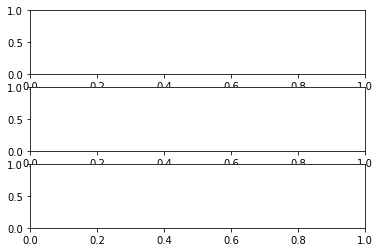

In [37]:
plt.figure(figsize=(16,8))
fig, axs = plt.subplots(3, 1)
for i in range(3):
    sns.lineplot(x=list(range(grads.shape[0])), y=grads[:, i], ax=axs[i]);

In [27]:
np.array([elem for elem in trained_embeddings[1][0] if elem]).mean(axis=0)

array([2.0429834e+14, 3.9604031e+14, 3.9604031e+14], dtype=float32)

In [10]:
#best of 100 iteration 0.081
# knn for nearest words
# plots for gradient l2 norm 
# profiler for time inside epoch c-profile, https://github.com/emeryberger/scalene
from sklearn.neighbors import NearestNeighbors

In [12]:
knn = NearestNeighbors(n_neighbors=5, n_jobs=-1)

In [13]:
knn = NearestNeighbors(n_neighbors=5, n_jobs=-1)
knn.fit(trained_embeddings)
neighbors = knn.kneighbors(trained_embeddings)
back_vocab = {item: key for key, item in vocab.items()}

NearestNeighbors(n_jobs=-1)

In [18]:
neighbors = knn.kneighbors(trained_embeddings)

In [23]:
back_vocab = {item: key for key, item in vocab.items()}

In [25]:
for i in range(1, len(vocab)):
    print(back_vocab[i],': ', ', '.join([back_vocab[idx] for idx in neighbors[1][i]]))

системный администратор :  системный администратор, самоконтроль, всем, платформер, юрист
чат бот :  чат бот, samsung, planning, open data science, emdrive
l3vpn :  l3vpn, антарктика, хосттрекер, ryzen, signalr
астероиды :  астероиды, icons, luajit, cloudlite, самомотивация
usability tests :  usability tests, reactive, терминология it, snapmirror, запреты
расстановка приоритетов :  расстановка приоритетов, rdbms, патчи, пульсометр, 26
студия :  студия, android app development, coreclr, межсетевые экраны, фиас
отопление :  отопление, rdbms, налоговая, командная продуктивность, ie11
локальная сеть :  локальная сеть, слепые люди, переезд в другую страну, push уведомления, command line
заказчики :  заказчики, foss news, 2gis, 0 day, li ion
список :  список, разработка под ios, backlog, ads b, octave
stealthwatch :  stealthwatch, intel sgx, игровой дизайн, заказная разработка, интеллектуальные системы
топ наука :  топ наука, эволюция, хакатоны, robot operating system, automotive
головоломка

киев :  киев, open data science, jit, стоматолог, andorro кино
idc :  idc, кпк, всем, антипиратский закон, remote work
пид регулятор :  пид регулятор, блок питания, eclipse, ecore, db
коммерсант :  коммерсант, почитать, техпроцессы, суд, dc_plus_plus
разработали :  разработали, железо и технологии, fps, вконтакте, alljoyn
awk :  awk, яндекс_dot_метрика, push уведомления, почитать, twitter api
коррупция :  коррупция, cve, c_plus_plus2a, браузера, винтаж
контейнерная виртуализация :  контейнерная виртуализация, dota, intel sgx, сканирование, sfinae
nrf51822 :  nrf51822, image classification, приватность, случайные числа, перспективы развития
ignite :  ignite, патчи, статистика, cncf, tox
новый год :  новый год, 2gis, intel sgx, балансировка, db2
теги никто не читает :  теги никто не читает, презентация проекта, ivr, сверточные нейронные сети, clean architecture
community :  community, онлайн продажи, website development, open data science, machine
shared library :  shared library, книг, 

html верстка :  html верстка, наставничество, электрон, microsoft teams, german
чернобыль :  чернобыль, google ventures, изучаем, spatial index, чип
дуглас энгельбарт :  дуглас энгельбарт, легаси, softline, налог на google, facebook
websocket :  websocket, релевантность, налог на google, корпоративные лаборатории pentestit, sha 1
высокочастотная торговля :  высокочастотная торговля, alljoyn, кража данных, метеостанция, речь
android os :  android os, ns 3, nuxtjs, scrum мастер, машинное обучение
пчеловодство :  пчеловодство, гены, brave, wi fi по человечески, watson
1c 8_dot_2 :  1c 8_dot_2, устройства, broadcast, code review, vpn сервис
acid :  acid, миграция данных, cda, отечественный софт, жить
ценные бумаги :  ценные бумаги, ретроконсоли, прогресс, путь, zynga
jitsi meet :  jitsi meet, dicom viewer, push уведомления, how, сквозная аналитика
фотоаппарат :  фотоаппарат, proxmox, палитра, haswell, техническое задание
jbod :  jbod, intel sgx, 25, публикация приложений, arduino mega serv

bolt :  bolt, 25, ito, трояны, организации
последовательность :  последовательность, мессенджер, налоговая, eddystone, бизнес процесс
кпк :  кпк, мошенничество, rdbms, подделка, сбертех
bim системы :  bim системы, career, decorator, совещание, solar security
поиск людей :  поиск людей, тепло, биография, qi, легаси
фотографии :  фотографии, emdrive, cs центр, _dot_next, терраформирование
антивирусная защита :  антивирусная защита, линейная регрессия, xml, разработка под ios, пробки
социология :  социология, почитать, программирование на android, indie gamedev, организация процессов
cucumber :  cucumber, open data science, погода, arc, гексагональная сетка
siri :  siri, релевантность, скорость света, запускает, фактор груп
ios 14 :  ios 14, pvs, tornado, должны, wiki
project management :  project management, mongo, патчи, гаджет, жидкостное охлаждение
калифорния :  калифорния, яровая, oculus rift, условиях, отчеты
августа :  августа, выпуск версий, математическое моделирование, 26, list


критически важные системы :  критически важные системы, новой, цод, конференц связь, intel sgx
со :  со, ucs, skype, playrix, кинотеатр
полет :  полет, ssl сертификаты, pushall, realtime, написание текстов
2g :  2g, выпуск версий, мотивация персонала, crl, доказательства
контроллер :  контроллер, онлайн продажи, ast, подделка, mocking
управление временем :  управление временем, spaceshiptwo, open data science, фича, navigation
expression trees :  expression trees, cda, самоорганизация, инвесторы, аксессуары
английские слова :  английские слова, permissions, iaas, intel sgx, iridium mobile
лицензионное соглашение :  лицензионное соглашение, подделка, iga, crossplatform, интервью с разработчиком
тренды :  тренды, bugs, jacarta, профессия, электронный документооборот
атомная энергетика :  атомная энергетика, результаты, дональд трамп, патчи, webinar
rfc :  rfc, подделка, google ventures, умный дом z wave, минкомсвязь
работы :  работы, доменные имена, клуб программистов, it grad, open data

базовый доход :  базовый доход, виртуальная память, rubymine, администрирование баз данных, патчи
holywar :  holywar, команда стартапа, улучшение, кеширование, хаббл
lambda :  lambda, браузерные расширения, crl, потребительское поведение, power bank
контейнервкаждыйдом :  контейнервкаждыйдом, gnupg, онлайн продажи, launch, техносерв
море :  море, profiling, питч, expression trees, интернет магазин
mail :  mail, лампы, зловредное по, антарктика, гексагональная сетка
голограмма :  голограмма, документы, веб проекты, twitter api, service mesh
graphics :  graphics, акб, токамак, пульсометр, airbus
robotics :  robotics, playrix, soap, push уведомления, 2gis
red team :  red team, opengl, websockets, iphone 7, 22
рои :  рои, open data science, vert dider, антарктика, самоорганизация
безопасность данных :  безопасность данных, буфер обмена, ссср, web scraping, мировое правительство
эксперты :  эксперты, open data science, ютуб, opensource, blackberry
продвижение в интернете :  продвижение в ин

ride :  ride, лампы, новой, malanov, соревнование
белок :  белок, observable, adblock, lokalise, panda
byyd :  byyd, измерения, sem, эвм, работа в google
old hard :  old hard, платформер, мобильный веб, flightradar24, cve
cisco :  cisco, автономная система, google apps, c_plus_plus2a, минкомсвязи
компьютерные науки :  компьютерные науки, multithreading, hi fi, я, sdk
искусство программирования :  искусство программирования, swift, атака, solar security, zextras
hack :  hack, банкоматы, hubex, бесплатных, межсетевой экран
высокое напряжение :  высокое напряжение, мультиклет, свобода, сплит тестирование, ula
коллекции :  коллекции, open data science, доктор веб, основные, смысл жизни
аналитика приложений :  аналитика приложений, палитра, недвижимость, авторские права, звёзды
децентрализация :  децентрализация, шутер, snake, lxd, owasp
calculator :  calculator, iphone development, утечка данных, подделка, ifc
помогает :  помогает, 26, лахта центр, индустрии, чиллеры
эволюция :  эволюция, 

команда :  команда, gps, новость, перенос, упаковка
segmentation :  segmentation, звонок с сайта, центр, samsung, исследователи
super nintendo :  super nintendo, 802_dot_11, акция, black friday, продуктов
studio :  studio, oculus rift, антивирус, суицид, sql tips and tricks
200 :  200, windows azure, самоорганизация, fortianalyzer, 26
pixel art :  pixel art, слияние, highload, высокая нагрузка, model
gensim :  gensim, антарктика, software guard extensions, автомобилестроение, креатив
cri :  cri, robot, app, инвесторы, путь
менторство :  менторство, siem, дистрибутивы, intel sgx, команда стартапа
си :  си, сквозная аналитика, архитектура по, cs центр, lxd
undefined behavior :  undefined behavior, розетта, data analyst, io_dot_js, yougile
орбитальные станции :  орбитальные станции, кризис, exceptions, veeam backup and replication, пишем
пошлины :  пошлины, кто, sed, ivr, замена
палитра :  палитра, raid, open data science, languages, онлайн платежи
зонд :  зонд, таргетированная реклама, m

celery :  celery, презентация проекта, пульсометр, emdrive, кликер
машинные данные :  машинные данные, nda, задачки, нелегальный контент, бэкап
wolfram mathematica :  wolfram mathematica, broadcast, патчи, до, антарктика
forms :  forms, fft, микрокомпьютеры, философия программирования, dd
еврокомиссия :  еврокомиссия, data analyst, московский рынок, microcontrollers, mssql
regionsoft crm :  regionsoft crm, платформер, mvvm, график, антарктика
vdi :  vdi, график, game engine, cvs, highload
openhab :  openhab, tutu_dot_ru, oculus rift, windows azure, гигиена
австрия :  австрия, ads b, view, гонконг, adobe
webdev :  webdev, json rpc, геркон, пользователь, baidu
биотопливо :  биотопливо, восточный, передатчик, sem, generic
karma :  karma, taxi, nda, антарктика, этого
спид :  спид, продвижение приложений, коммутатор, open data science, highload
solar jsoc :  solar jsoc, условиях, it юрист, inobitec, программный рендеринг
cybersyn :  cybersyn, бэкап, восточный, rubymine, mapbox
database migr

new horizons :  new horizons, apache spark, ev, графические интерфейсы, sdk
смартпрогресс :  смартпрогресс, фрилансер, трекер, книг, arm
продажи через интернет :  продажи через интернет, permissions, элементы питания, электронные лампы, лампы
чубайс :  чубайс, rdbms, universal windows platform, рогозин, gopro
ии и машинное обучение :  ии и машинное обучение, touch id, tftp, bigdata, вознаграждение
вертолеты :  вертолеты, e2e, результаты, перцептрон, вознаграждение
коммунизм :  коммунизм, rdbms, wi fi по человечески, слепые люди, byod
10 :  10, нарушения, геймпад, карьера в сша, доходы
радиоволны :  радиоволны, электронный документооборот, кнопка, mesh сеть, симуляция
кодирование :  кодирование, tutu_dot_ru, облачные услуги, brave, гражданская оборона
intellij :  intellij, раза, website development, touch id, график
светодиодное освещение :  светодиодное освещение, 26, bigdata, системный анализ, data scientist
opengl 3 :  opengl 3, _dot_next, world, учебный процесс в it, выживание
крипт

razberry :  razberry, andorrosubs, космонавтика, iaas, dji
блокчейн технологии :  блокчейн технологии, тексты, дискретная математика, mpp, svd
etw :  etw, microsoft azure, гены, наставничество, спрайты
ray tracing :  ray tracing, software guard extensions, мировое правительство, rewarded video, систему
sentry :  sentry, pythonetc, open data science, clippy, человечность
аудиодайджест :  аудиодайджест, open data science, emdrive, антивирус, функций
erlang :  erlang, fault tolerance, gazebo, карточные игры, сетевая инфраструктура
ит компании :  ит компании, ito, cri, gunicorn, приключения
индустрия :  индустрия, лето, new year, инвестиции в стартапы, бэкап
13 :  13, doh, нейронаука, судебный иск, msp430
платежи :  платежи, кипр, avaya, motorola, jit компилятор
астрофотография :  астрофотография, слепые люди, kaspersky lab, pgen, измерения
ржд :  ржд, должны, ицбм, decorator, хаббл
50 :  50, 25, xml, yougile, c_plus_plus2a
хранение :  хранение, подделка, gps, rdbms, система мониторинга
бе

иммунитет :  иммунитет, team, спутниковый интернет, crossplatform, тинькофф
change management :  change management, доменные имена, нитро, подделка, tor project
фотоны :  фотоны, наставничество, array, космические запуски, продуктовый маркетинг
nomad :  nomad, франшиза, должны, графика, подделка
cors :  cors, oculus rift, выставки, прототипирование, тепло
crm системы :  crm системы, mssql, перспективы развития, windows azure, подделка
cassandra :  cassandra, 3dtoolru, серверное оборудование, мобильная версия, gnss
nes :  nes, navigation, виртуальная реальность, launch, oculus rift
intel realsense sdk :  intel realsense sdk, covid 19, религия, новинки, gopro
predator :  predator, сбор средств, цвета, дипфейки, daydream
атом :  атом, netflix, путешествие, luks, holyjs2018piter
тайлы :  тайлы, spl, kit, mishiko, питание
имитационное моделирование :  имитационное моделирование, sdk, геркон, управление услугами, монетизация мобильных приложений
текстурирование :  текстурирование, open data 

synergy :  synergy, переезд в другую страну, скорость света, google ventures, fortigate
трансляция :  трансляция, rop, 26, data analyst, google ventures
системы счисления :  системы счисления, бэкап, intel sgx, lifehack, переезд в другую страну
orbiter :  orbiter, звонок с сайта, open data science, бесплатных, insight
launch :  launch, онлайн продажи, мозговой штурм, маршрутизация, rubymine
how to :  how to, реклама, расследования, jbreak2018, qt5
умные автомобили :  умные автомобили, dc_plus_plus, moikrug_dot_ru, презентация проекта, twitter api
гидра :  гидра, samsung, 25, гексагональная сетка, permissions
солнечная энергия :  солнечная энергия, open data science, ps5, siem, raycasting
китайский рынок :  китайский рынок, доменные имена, робоавтомобили, hackquest, root
библиотеки :  библиотеки, grep, наушники, gopro, апреля
torrent :  torrent, моделей, pushall, подделка, коллекции
одном :  одном, google ventures, intel sgx, сбп, бронирование
софтверные патенты :  софтверные патенты, к

eink :  eink, qa testing, лампы, led, google ventures
бразилия :  бразилия, 4, german, oculus rift, игровой дизайн
индустрии :  индустрии, многопоточное программирование, систему, мировое правительство, software guard extensions
proof of work :  proof of work, rdbms, медицинские технологии, должны, command line
системы управления версиями :  системы управления версиями, savage, алгоритм дейкстры, стив возняк, слежка
вакцинация :  вакцинация, openscenegraph, callbackhunter, алишер усманов, подделка
языки мира :  языки мира, презентация проекта, программа, инфографика, rce
любовь :  любовь, подделка, remote access, forth, aviasales
r :  r, command line, бизнес идеи, yammer, pythonetc
sysfs :  sysfs, beta, decorator, apm, эмоциональный интеллект
архитектура :  архитектура, open data science, ras, rs 485, bigdata
raiffeisendgtl :  raiffeisendgtl, crossplatform, игровые автоматы, беспроводная сеть, gartner
fedor :  fedor, задача трех тел, выставка, должны, alljoyn
закон мура :  закон мура, 

qt quick :  qt quick, гайд, vmware, gorilla glass, самооценка
vision :  vision, организация процессов, когнитивная психология, бронирование, boring company
суверенный интернет :  суверенный интернет, изучение английского, odbc, репортаж, game designer
15 :  15, open data science, дифференциальные уравнения, artemis, json rpc
iscsi :  iscsi, микрокомпьютеры, космические запуски, английский обучение языки, daydream
полеты :  полеты, svn, сотрудников, балансировка, siem
все :  все, it отрасль, алишер усманов, opus, спид
вконтакте api :  вконтакте api, нейротехнологии, software guard extensions, terminal, университет итмо
uikit :  uikit, сегодня, расследование инцидентов, пентестинг, luks
поможет :  поможет, репликация, таргетированная реклама, universal windows platform, подделка
конкурентная разведка :  конкурентная разведка, космические запуски, нейрон, пульсометр, путь
бактерии :  бактерии, rom, внедрения, хайп, человечность
server :  server, hipchat, facebook, рост конверсии, schema_d

пиво :  пиво, opus, google ventures, фильтрация трафика, радиотехника
розничная торговля :  розничная торговля, qbs, vector drawable, carrot quest, перцептрон
ga :  ga, высокочастотный трейдинг, caching, backlog, bigdog
бельмонте :  бельмонте, офисные приложения, специальность, pixelart, 26
безопасность мобильных приложений :  безопасность мобильных приложений, software guard extensions, платформер, слежка за гражданами, доктор веб
точки :  точки, история ит, психотерапия, бэкап, мотивация персонала
телефония :  телефония, asus, накопитель, cve, антипиратский закон
бэм :  бэм, такси сервис, sdk, радар детектор, pathfinding
misra :  misra, hr менеджер, pathfinding, метрика, hiring
devkit :  devkit, fail, микроскоп, ракета носитель, патчи
развития :  развития, сверхпроводимость, pentium, антарктика, отели
tls 1_dot_3 :  tls 1_dot_3, должны, io_dot_js, srgb, odbc
кондиционирование :  кондиционирование, dapp, сотовые сети, самомотивация, магазин sound4you
rustfmt :  rustfmt, кинотеатр, sre

postcss :  postcss, 25, e mail, playrix, xdebug
жизненный опыт :  жизненный опыт, мобильность, дизель, cda, shodan
1984 :  1984, iaas, мошенничество в интернете, open data science, космические лучи
ispmanager :  ispmanager, алиса, дизайнеру, filter, yii2 framework
полезные советы :  полезные советы, open data science, игр, звёзды, власть
philae :  philae, терраформирование, laravel 5, teamcity, тинькофф
фитнес браслет :  фитнес браслет, vrd, пиво, banzai games, шутеры
фрилансим :  фрилансим, meltdown, мечта, функций, universal windows platform
uv :  uv, yougile, мировое правительство, рекламодатели, intel sgx
знать :  знать, heisenbug2020, software guard extensions, product owner, медитация
июля :  июля, питч, продуктовый менеджмент, open data science, до
безработица :  безработица, motorola, torch, командная строка, презентация проекта
android разработка :  android разработка, open data science, 25, броня, eye tracking
интервьюирование :  интервьюирование, soap, мобильный телефон, спо

user experience design :  user experience design, db2, презентация проекта, dc_plus_plus, cs центр
автомобиль :  автомобиль, daydream, ito, космические полеты, airflow
pwm :  pwm, audiocodes, remote access, doom, палитра
изменение поведения :  изменение поведения, raiffeisenit, progressive enhancement, io_dot_js, франшиза
торговля на бирже :  торговля на бирже, openstreetmap, rdbms, сквозная аналитика, sql tips and tricks
контакт центр :  контакт центр, tdms, стоматолог, новость, наушники
spatial index :  spatial index, моделирование предметной области, здоровье глаз, view, симуляция
группы :  группы, конкурсы разработчиков, gdpr, bms, process
nest :  nest, qt5, энтони роббинс, open data science, параллельное программирование
разбираемся :  разбираемся, software guard extensions, intel sgx, изменение климата, рассылки
persistence :  persistence, microsoft azure, порнография, command line, dma
generator :  generator, siem, афиша, customer service, алишер усманов
dedicated server :  dedi

cognitive services :  cognitive services, abs, moikrug_dot_ru, мировое правительство, теория категорий
boston dynamics :  boston dynamics, лампы, google ventures, воровство, призы
развитие проекта :  развитие проекта, жизненное, электронные лампы, обработка, visual c_plus_plus
ее :  ее, онлайн продажи, mishiko, анатомия, window functions
электропитание :  электропитание, ec2, etherium, tcl, доменные имена
sobjectizer :  sobjectizer, я, сквозная аналитика, ii, самоорганизация
симулятор :  симулятор, антарктика, game engine, брикс, intel sgx
командная продуктивность :  командная продуктивность, исключения, должны, opensource, миграция данных
crm для малого бизнеса :  crm для малого бизнеса, promobot, промсвязьбанк, безопасность платежей, концентрация
vivaldi technologies :  vivaldi technologies, frontend разработка, проектирование по, которых, cve
nrf52832 :  nrf52832, kompas 3d, sdk, бизнес, виртуальный офис
msp430 :  msp430, речь, автономная система, журналисты, олимпийские игры
иннопо

мониторинг транспорта :  мониторинг транспорта, open data science, шпд, батарейки, сибур
usb 3_dot_0 :  usb 3_dot_0, подделка, open data science, доменные имена, лицензионный контент
голосовой интерфейс :  голосовой интерфейс, kanban, software guard extensions, dedicated server, hdd
uk :  uk, cve, высокопроизводительные вычисления, чиллеры, мысли вслух
fp :  fp, власть, доменные имена, open data science, banzai games
hydra :  hydra, услуги связи, ssl сертификаты, доменные имена, alljoyn
доставка :  доставка, речь, продукты, superfish, оптимизация запросов
assets :  assets, рост конверсии, dom, график, доктор веб
material design :  material design, доступ в интернет, bobby, подделка, performance review
css :  css, повторное использование ракет, planning, посты, подделка
irq :  irq, карьера, ifc, чаэс, гипотезы
dynamic :  dynamic, обзор программ, функции, service mesh, гексагональная сетка
человечество :  человечество, db2, про, оптимизация сайтов, системы
панорама :  панорама, мфу, data

z wave :  z wave, офисные приложения, code, автомобилестроение, railsclub
conference :  conference, command line, chrome web store, городор, бизнес модели
телекомы :  телекомы, eddystone, artezio, esp8266 arduino, инфографика
млрд :  млрд, bugs, кровь, windows phone, моделей
высокая доступность :  высокая доступность, лицензионный контент, вознаграждение, техпроцессы, 3d принтер
скорость интернета :  скорость интернета, гексагональная сетка, пользователь, oculus rift, подделка
catboost :  catboost, cdr, офисная жизнь, вендоры, railsclub
li ion :  li ion, карточные игры, заказчики, bms, i
бизнес модель :  бизнес модель, epic games, читалка, ревью кода, notepad
drivers :  drivers, open data science, pwa, seo продвижение, backup
call of duty :  call of duty, суд, 26, kaspersky lab, mishiko
dvd :  dvd, набор, notepad, дистрибутивы, microsoft teams
service discovery :  service discovery, занимательные задачки, основе, call of duty, sdk
maps_dot_me :  maps_dot_me, superfish, отели, siem, pha

amazon :  amazon, ras, ретро пк, jce, robinhood
алгоритмы сортировки :  алгоритмы сортировки, хакинг, подделка, gridgain, патчи
frontend :  frontend, хабрахабр, отчеты, gcp, эзотерические языки
e :  e, геркон, фотополимерный 3d принтер, the pirate bay, должны
unix :  unix, потребительское поведение, 25, кража данных, logitech
arkit :  arkit, банкоматы, патчи, jwt, темная материя
md5 :  md5, интенсив, госуслуги, kit, собаки
парсер :  парсер, call tracking, open data science, new year, просто о сложном
hyperx :  hyperx, антивирус, мфу, полупроводники, highload
мобильного :  мобильного, солнечное затмение, дисплей, ras, oracle database
студентам :  студентам, дисплей, бухгалтерия, простых, beginners
livedata :  livedata, log, cache, должны, ito
ads b :  ads b, 25, command line, sdk, карьера
книги :  книги, вангеры, evernote, gcp, english language
web api :  web api, космические станции, моделирование предметной области, мизулина, ifc
library :  library, человечность, удобно, western digit

дайджест it hr событий :  дайджест it hr событий, кража данных, смартпрогресс, data analyst, антенна
гайдлайны :  гайдлайны, 25, носители информации, aso, 2017
гитара :  гитара, bigdog, zookeeper, open data science, windows azure
трактор :  трактор, в бесконечность и далее, кеширование, gcp, выпуск версий
диета :  диета, dfs, jquery, умные весы, istqb
комьюнити :  комьюнити, arduino mega server, atlassian sdk, shodan, 3cx
невозможный двигатель :  невозможный двигатель, клавиатура, пиво, nebula, космические запуски
лазерная резка :  лазерная резка, сетевые протоколы, лахта центр, nxp, ux для новичков
нет :  нет, новинки, магистратура в сша, malloc, android app development
нам :  нам, notepad, list, бэкап, ux для новичков
рекрутмент :  рекрутмент, стилизация, c_plus_plus2a, приложений, json rpc
нагрузка :  нагрузка, интервью с разработчиком, новинки, smarttv, клуб программистов
распределённые вычисления :  распределённые вычисления, лицензионный контент, owasp, доступ в интернет, наушник

итоги года :  итоги года, software guard extensions, созданию, bitrix, стоит
учетные записи :  учетные записи, smart watch, оптимизация сайта, pixel, бэкап
планы :  планы, антарктика, istqb, architecture design, touch id
3dtoolru :  3dtoolru, cassandra, english language, nss, новой
tails :  tails, rdbms, новая, кнопка, gcp
базовая станция :  базовая станция, сетчатка, сфера, mail_dot_ru, vimpelcom
корпус электроники :  корпус электроники, abbyy, подделка, аэропорты, в бесконечность и далее
mosquito :  mosquito, oculus rift, processing, zimbra collaboration open source, navigation
торренты :  торренты, open data science, антарктика, ntechlab, основные
слепота :  слепота, code, railsclub, canon, nature
квартира :  квартира, обзор программ, tcl, istqb, emdrive
коммутация :  коммутация, воровство, веб скрейпинг, dkim, ссср
спецификации :  спецификации, recruiting, протоны, tesla model 3, synopsys
canon :  canon, globalsign, composition, ci, alerting
hr бренд :  hr бренд, ivr, io_dot_js, пр

{'системный администратор': 1,
 'чат бот': 2,
 'l3vpn': 3,
 'астероиды': 4,
 'usability tests': 5,
 'расстановка приоритетов': 6,
 'студия': 7,
 'отопление': 8,
 'локальная сеть': 9,
 'заказчики': 10,
 'список': 11,
 'stealthwatch': 12,
 'топ наука': 13,
 'головоломка': 14,
 'прототипирование': 15,
 '3d принтеры': 16,
 'the': 17,
 'tfs': 18,
 'inkscape': 19,
 'цветовая схема': 20,
 'indexing': 21,
 'умзч': 22,
 'дизайн персонажей': 23,
 'глушилка': 24,
 'typescript': 25,
 'amazon aws': 26,
 'аварии': 27,
 'react router': 28,
 'mda': 29,
 'swift 4': 30,
 'разбор': 31,
 'soa': 32,
 'возобновляемая энергетика': 33,
 'thin client': 34,
 'екатеринбург': 35,
 'шаблоны': 36,
 'ребрендинг': 37,
 'продвижение': 38,
 'it технологии': 39,
 'linux kernel development': 40,
 'прерывания': 41,
 'каналы связи': 42,
 'gitlab runner': 43,
 'pvp': 44,
 'комета': 45,
 'юрьева ночь': 46,
 'noolite': 47,
 'начало пути': 48,
 'разработка продукта': 49,
 'fio': 50,
 'atom': 51,
 'waves platform': 52,
 'биолог

In [39]:
import numpy as np
sims = trained_embeddings[1:, :].dot(trained_embeddings[1:, :].T)

In [40]:
sims = np.argpartition(-sims, 10)[:, :10]

In [43]:
for word, similars in zip(vocab, sims):
    print(word, ':',', '.join([back_vocab[idx+1] for idx in similars]))

системный администратор : всем, multiplayer, books, простые числа, 2017, самоконтроль, weblancer, системный администратор, вебинары для разработчиков, видеоочки
чат бот : дизайн интерфейсов, разведка, чат бот, развитие, kingston, lightsail, товар, pandoc, django rest framework, comodo
l3vpn : signalr, хосттрекер, l3vpn, ryzen, сделаем код чище, adobe, покупки в сша, цифровые технологии, php 7_dot_4, gtk
астероиды : can, icons, cloudlite, астероиды, lyx, snapdragon, фэнтези, comptek, pebble, мультикоптеры
usability tests : диабет, reactive, godot, games, usability tests, snapmirror, терминология it, finite state machine, интересностиполезности, конфиденциальная информация
расстановка приоритетов : delphi, фабрика печати epson, распределенные команды, ракеты носители, выбор проектора, расстановка приоритетов, тюрьма, конвейер рендеринга, государственные органы, юмор на хабре
студия : фиас, межсетевые экраны, accessibility, wi fi, imagine cup, tomcat, студия, ux дизайн, sparql, велоспорт


webkit : google cardboard, безопасность данных, m_dot_2, engine, heroku, webkit, ontap, домашний кинотеатр, lpwan, облачные провайдеры
entity framework : entity framework, тюрьма, да, фьючерсы, форумы, geekbrains, apc, ускорение сайта, триггер, fast_dot_ai
норвегия : информационная архитектура, гаджеты для детей, энергопотребление, норвегия, судебные разбирательства, srp, нужны, code style, пошлины, issue tracker
ecmascript 2015 : annotations, acl, wechat, ecmascript 2015, шутер, удаленный офис, modules, шлюз, создание игры, osmocom
флешки : флешки, bitbucket, itglobal_dot_com, костыли, наушники, даркнет, информационный поиск, облачные хранилища, wanhao, power platform
гайд : обработка изображений, domain driven design, qt quick, dodo pizza engineering, покрытие кода, написание текстов, гайд, singleton, высоконагруженные системы, доступа
web application : web application, магнитометр, discord, авторы, первый канал, tuple, совет директоров, системный анализ, aot, распространение
небоскр

mooc : свёрточная нейросеть, mooc, архивация, classification, управление продажами, выделенные серверы, вторая, controller, c_plus_plus17, nuxt
paul graham : remote work, paul graham, fail, qnap, файлов, антивирусы, подрядчики, учетные записи, диета, коллектив
переговорная комната : игровая физика, фронтенда, netscaler, roguelike, переговорная комната, софт, utm, arpanet, стал, bmc
над : над, почтовые рассылки, mr, adobe, cctv, полиция, гены, ftc, обучение за рубежом, развитие интернета
bitlocker : bytecode, bitlocker, дизайнеры, gecko, альтернативные источники энергии, rc, top 3d shop, ios, нас, светильник
сервера : phone, конверсия сайтов, объединение, сервера, 2гис, образование, гики, егэ, webview, redmond
термоядерный реактор : travel, платы, инструкции, studio, роботы автомобили, термоядерный реактор, disney, стереотипы, sdn, google glass
habrbusters : habrbusters, самолёт, факториал, гипервизор, посылки, доступ в интернет, telegram bot, jolla, xor, жаров
modules : ecmascript 2015

ракета : codereview, лекарство, ракета, baremetal, phpixie, backblaze, state, seo оптимизация, tomcat, вкалывают роботы
автоматическое управление : утечка паролей, ликбез, totp, страхование, kernel, автоматическое управление, развитие компании, инфраструктура, node_dot_js, software asset management
профессии будущего : курьезы, профессии будущего, сроки, ms sql server, терапия, wordpress plugins, на луну, агрегация новостей, калькуляторы, vulnhub
dodopizzaengineering : телеком, mail_dot_ru cloud solutions, dodopizzaengineering, database design, облигации, алгоритмическая торговля, здоровое питание, фриланс, power platform, ipsec
акб : graphics, акб, ces 2015, rustfmt, php fpm, russian code cup, квантовая гравитация, 8, тентакли, делать
mailchimp : программирование для детей, роспотребнадзор, mailchimp, алгоритмы обработки данных, джулиан ассанж, соцсети, продукта, долги, defcon, help desk software
технострим : михалков, mobile applications, erasure coding, патент, технострим, redmine, 

ремонт : тематическое моделирование, openocd, подписки, регионы, eyes, ремонт, домашние кинотеатры, контроль, input, call tracking
бумага : reflection, бумага, оценка трудозатрат, приставка, техническое интервью, iphone 6, коды рида соломона, информационной, метеорология, воспитание
palo alto : исследование космоса, palo alto, мозг компьютер, суд, pechkin mail_dot_ru, микроконтроллеры stm, изменения, recovery, write ahead log, продажа бизнеса
история стартапов : генетический тест, самолёт, история стартапов, того, устройство, граф знаний, маяк, kinetis, google adsense, ричард фейнман
светильник : асинхронное программирование, светильник, блокировка рекламы, премии, модель, hashmap, bitlocker, exception, аренда, виртуализация
malware : malware, технопарки, dash, cpu, своих, pvs studio for linux, ведомости, rtsp, фотополимер, онланта
rtls : управление требованиями, uart, машинного, методология, rtls, universal, clustered ontap, хелпдеск, водяное охлаждение, подсветка
эмиграция из россии 

хекслет : lorawan, itmo university, структура проекта, хекслет, электронные сигареты, апокалипсис, google plus, android sdk, высокотехнологичные компании, holywar
sphinx : локализация интерфейса, ит индустрия, фильтры, тензор, календарь тестировщика, ev3, sphinx, ad, zen, course
программиста : chakra, торрент трекеры, eff, отчетность, программиста, прогресс м 27м, solidworks, leroy merlin, service locator, дискриминация
modeling : modeling, андроид, схема, операция, облачные провайдеры, версии, byyd, phpixie, tsdb, frameworks
подводная навигация : версии, юзабилити интерфейсов, high end, химия, подводная навигация, обзор смартфона, жизнь, kepler, half life  alyx, geekbrains
линзы : маркетинг для стартапа, линзы, издательский бизнес, zeronights, релизы, ios, инклюзия, перовскит, день системного администратора, работа в стартапе
кии : кии, каспаров, медицина, форензика, lastpass, освоение луны, lucene, кассовая программа, экзопланеты, webextensions
магазин sound4you : atm, xiaomi, haskel

джойстик : ровер, джозеф ликлайдер, хиггс, шоу, джойстик, truecrypt, инженер, снпч, презентация, terminal
blog : бизнес аналитика, blog, операционные системы, платежные карты, вместе, superjob_dot_ru, samsung galaxy, mit, социализация, asn_dot_1
nlp : мнения, помогает, ods, nlp, hashmap, ntp, mmorpg, киберугрозы, блог компании sound4you, фотополимер
gps навигация : андроид, кофеин, встраиваемые системы, поиск пути, аутентификация, gps навигация, клиентский сервис, сверхновая, scss, океаны
федор : запуск проекта, silabs, google play, федор, поглощение, симулятор, bluetooth le, видеоконференция, галактеко безопасносте, e legion
стэпик : пасхальные яйца, работа со звуком, стэпик, управление услугами, нуля, 1с битрикс, гарнитура, rdf, home office, дистрибуция контента
emet : realsense, routing, накопитель, emet, самоизоляция, уборка, факап, отзыв, wolfram mathematica, autotest
язык c : преступления, деменция, язык c, аутентификация, i18n, байкал т1, сенсоры, srgb, сахалин, имплантат
cv : c

склады : standoff, фьючерсы, нейросети, углерод, hackerone, склады, ats, планировщик задач, devfest, атлас
обри де грей : teams, mips, nextcloud, обри де грей, мелкая питонячая радость, юзабилити тестирование, raspberry pi, роботы убийцы, errors, реализации
virtual reality : callback, fi, static code analysis, мобильный веб, perl5, virtual reality, telegram bots, fortran, php5, ноутбук
proliant : реагирование на инциденты, доклад, gis, development, proliant, стратегия развития, sublime text 3, студентам, parallel programming, на луну
2fa : самых, yii2 framework, 2fa, основы программирования, puppeteer, sim карты, гитары, инженерные решения, расширение, весткомп
коллективный разум : колибриос, корреляция данных, web программирование, коллективный разум, pr, qwerty, инженерные системы, металлообработка, смарт контракт, цифровые технологии
вкалывают роботы : платформы, tee, вкалывают роботы, браслет, самых, операционная система, rakudo, воз, unet, читерство
хаббл : роботов, форум технолог

реверс инжиниринг : opensourse, rpc, устройства на микроконтроллерах, возобновляемая энергетика, реверс инжиниринг, рост, концепт, javascript nodejs reactjs, 1cloud, yota
фрилансеры : x64, slf4j, hr технологии, безопасность интернета вещей, локализация интерфейса, dev, фрилансеры, kerio, lenovoin, киберпреступники
beefree : benchmark, seo продвижение, beefree, vscextv, фреймворки, через, pvs studio for linux, another world, templates, гравитация
школа разработчиков : школа разработчиков, биржа, angular_dot_js, эмоциональное выгорание, дистанционное обучение, фингерпринтинг, translator, draytek, плутоний, cross platform
rxjs : цка, tdd, возможностей, российско китайский проект, rxjs, разных, интересных, гиперконвергентность, data engineering, продажи в интернет
hevc : каталог, билайн, hevc, блогеры, highscreen, galileo, apu, презентации, словарь, intel xeon
сысоев : крипта, сысоев, нарратив, idc, свой, вопросов, rowhammer, регистрация бизнеса, falcon 9, nanocad спдс металлоконструкции
g

психика : mail_dot_ru cloud solutions, психика, sci fi, блок питания, почтой, правительство рф, vbscript, фитнес браслет, профилирование производительности, исследование
производство корпуса : производство корпуса, структура сайта, unit tests, selectel, рекорды, проекта, conference, mac, crm для малого бизнеса, дискретная математика
conversational ai : приватность, интенсив, тесла моторс, conversational ai, iana, экспертные системы, договоры, поколения, vulnhub, ios11
зеркало : трафика, зеркало, sednit, syslog, фестиваль, ami, growth hacks, головоломка, нечеткий поиск, итэлма
блог binary district : задачи для программистов, гаджеты для детей, россия, свобода слова, tunnel, ноутбуки, анимация, хоттабыч, блог binary district, разгон
openresty : express_dot_js, openresty, oled, crm для малого бизнеса, руководство, saga, huawei, кибератаки, экзоскелеты, защита прав потребителей
новые медиа : новые медиа, помощь, конверсия сайтов, dnssec, онлайн казино, основы программирования, мцст, расска

веб сервер : лпк, erlang_otp, электромобили, splunk, геймдев, веб сервер, aol, pagespeed, гены, управление памятью
уязвимость нулевого дня : когнитивная психология, рекрутинг, вторая, ip телефон, автоматизация склада, учебный процесс, уязвимость нулевого дня, dmca, nimble, autopilot
misteam : автоматизация рутины, artezio, сибур, misteam, афк система, sd, voip, the standoff, скорость загрузки, фото
lesson : мир hi fi, play, фильтры, mcs, lesson, qrator, фз 54, codeception, noscript, support
крым : sales, вечерняя школа слёрма, качество данных, непрерывная интеграция, маразм, feature toggle, девятая планета, дезинфекция, ocz, крым
обзоры : интересных, script, обзоры, радиоканал, генеративное искусство, windows phone 8_dot_1, печатная плата, радиосвязь, кризис менеджмент, безопасность в сети
факап : личная эффективность, безусловный основной доход, dicom, социальные проекты, ретейлеры, факап, системы безопасности, supply chain, капитализация, jokerconf
development : verilog, development,

db : db, пид регулятор, data, ip телефония, смартфона, 3д печать, patch, паяльник, famicom, чёрная дыра
пятница : otp, пятница, reactor, svg, 3cx, funtech, история науки, holyjs, вопросы на собеседовании, exchange
m2m : nutanix, накопители данных, m2m, архив, тыжпрограммист, создавать, вычислительные машины, elk, дистанционное обучение, футурология
быстрая сортировка : эмуляторы, наблюдение, быстрая сортировка, clustering, квантовый компьютер, foxconn, cc65, mvno, телекоммуникационное оборудование, подход
chakra : chakra, habrahabr, сверхновые, халява, программиста, видеокамера, роботы автомобили, школа вебмастеров, свежих, синусоида
числа : power bi, числа, key value storage, игры для программистов, osx, эксперимент, искусственный интеллект, raiffeisen, swift  разработка, nike
unity уроки : pbr, селфи, tor browser, спросите итана, unity уроки, офисное по, хранение изображений, аэродинамика, cpanel, testcontainers
магнитная левитация : магнитная левитация, pmm, player, angry birds, hel

ик : ик, успешность, 11, huawei enterprise, гравитация, sql antipatterns, премия, baremetal, антипаттерны, big data
канбан метод : google adsense, канбан метод, ups, сообщения, адвокатская помощь, умная техника, мировые рынки, управление людьми, библиотеки lua, зомби
hackquest : валютный контроль, логотип, китайский рынок, высокое напряжение, термоядерный синтез, cwe, v16, диджитализация, hackquest, голосовые ассистенты
stereo vision : seo оптимизация, physics, basecamp, stereo vision, logistic regression, performance tests, квантовый компьютер, диаграммы, генетический тест, web разработка
диммер : payoneer, инновационные компании, бизнес персона, книга, извлечение данных, свобода, mimo, диммер, бэкэнд, новосибирск
linkmeup : ит предпринимательство, киберпреступники, linkmeup, корпоративное по, урожай, etoken, тендер, ios11, infosec, человечество
announcement : announcement, fqdn, single page application, lesson, call центр, простой, fintech, mitm, magic leap, advertizing
тостер : razr

magento2 : школьное образование, magento2, пайка, минкомсвязи, reactive extensions, командная работа, high scalability, fm, индия, питерская вышка
диэлектрики : internet of things, закладки, диэлектрики, ptz камера, worker, public key, stripe, пользовательские сценарии, машинное, немного
аврора : ist, аврора, ascii art, цка, wi, робототехника для детей, управление продажами, сотовая связь, пользовательские сценарии, blade
оповещения : finite state machine, distributed computing, информатика, оповещения, когнитивные способности, станки, новосибирск, автоматизация предприятий, gnupg, облигации
mba : разум, балансировка нагрузки, mba, файлов, база данных, мысли, неудачи, netapp, gaia, data driven
сбертех : tech, vimeo, малинка, сбертех, кпк, rpc, казахстан, attiny13, regionsoft, тренинги
locks : framework, как все устроено, планы, питч, восстановление данных, robot wars, locks, надёжность, homekit, led light
роскомсвобода : оптоволокно, инвестирование, командообразование, языки программир

разработка систем связи : разработка систем связи, росреестр, abap, орбитальные станции, панорамное видео, расширяя возможности, баги, сегментация изображений, кибератаки, the ember times
соревнования по программированию : теория струн, баги, союз 2_dot_1а, vimpelcom, openui5, соревнования по программированию, ocr технологии, патентные войны, преступление и наказание, простой
roguelike : байконур, roguelike, репозитории, проекция, msvc, gotech, переговорная комната, пришельцы, scaleio, windows defender
кислород : phdays, stack overflow, квантовая гравитация, oneweb, кислород, anonymous, макбук, элон маск, nexus, rust
длиннопост : образование 2_dot_0, quest, aspectj scripting, мисис, длиннопост, наталья касперская, malware, heroku, магистратура, books
разработка : hyperloop, справедливость, аллергия, клиентский опыт, разработка, tdd, silverlight, блокчейн платформа, виртуальный хостинг, benchmarking
semaphore : semaphore, проектов, new media, neoquest2018, мобильное приложение, паралич,

snapchat : шифрование, микрон, жж, snapchat, мелкая питонячая радость, кибербезопасность, servicedesk, кадры, фотоника, преобразование фурье
bittorrent : себя, отпечатки пальцев, new release, bittorrent, as we may think, лпк, networks, figma, зрение, spring data
бюджет : российские компании, telephone, okko, приглашаем, бюджет, гипервизор, 30, проекты, rbkmoney, яндекс директ
реклама в интернете : hashmap, автомобилестроение, реклама в интернете, владимир, stepik_dot_org, внедрение, организация мероприятий, рейтинг ит компаний, формы, блоки
adobe illustrator : шлем виртуальной реальности, датасет, ros, coroutines, adobe illustrator, контест, gitops, частный космос, выручка компаний, россия
check point : запах, gps спуфинг, втб, reflection, twilio, использования, хранение изображений, check point, кредиты, training
информатика : системы хранения данных, взломы, оповещения, scraping, 386, agile, контракт, служба доставки, информатика, часы
куба : ооо, куба, x, во, проблема, fullstack dev

itglobal_dot_com : itglobal_dot_com, промышленные роботы, ida, психология продаж, массив, ракеты, adaptive defense 360, stack, окружающая среда, способов
курс рубля : ces 2020, еженедельная сборка, берлин, openai, курс рубля, aosp, pyconrussia, лого, проектирования, телевизоры
sharepoint : дата центр миран, нанотрубки, sharepoint, позиционирование, top3dexpo, видеокамера, branding, астрология, химия, поиск работы
своих : своих, архив, ux, work life balance, swift 5, malware, си, онлайн ретейлеры, devexpress, прививки
dram : dram, random, emberjs, сети, watson, физический эксперимент, делали, indie gamedev, origin, трудности
аудиоаппаратура : mailru, масштабирование, аудиоаппаратура, uefi, drone, survey, сетевые протоколы, мобильные сервисы, авто, каналы
черный список : clojure, пароль, триггер, черный список, infrastructure as code, text to speech, съемка, техподдержка, читалки, облачный гейминг
уолл стрит : схемотехника для чайников, уолл стрит, консоли, используют, knx, parallel comp

titan : профилактика, ota, titan, дейкстра, data engineering, seaborn, keycloak, project, panda systems management, вода
debian : документация кода, debian, medium, spacex, data warehouse, онлайн покупки, safedata, постсекулярность, альцгеймер, архитектура компьютера
vp8 : vp8, интернет сервис, курьезы, изоляция рунета, keepass, цели и задачи, y combinator, vivado, red team, центр сертификации
jest : cisco asa, инфобип, puppeteer, jest, создавать, форензика, qtcreator, bsd, ocr технологии, беспроводные сети
жизни : metamodel, жизни, хранилище данных, alconost translations, право, временные ряды, tier, пожар, конфигурация, hola
blogger : blogger, прямая трансляция, growth hacking, smart contract, cmos, ответственность, число пи, comsol, перестановки, 42
силиконовая долина : mbed, силиконовая долина, регистраторы, proxy, медиастример2, crud, голосование, h2o, сетевые протоколы, intel nuc
лахта центр : лисп, customization, квантовые технологии, лахта центр, internet, газонокосилка, memory

xamarin_dot_android : botnet, office store, swift 3, visual, компаний, рынок, xamarin_dot_android, инициатива, python 3, node_dot_js
seaborn : neoquest, spectre, multiclet, titan, seaborn, фнс, микрофоны, рублей, dotnet core, онлайн ретейлеры
mysql : новичкам, мобильные устройства и приложения, конвертация, ltv, spam, мониторинг сайта, mysql, шрифт, доход, фз 54
рекламодатели : рекламодатели, reprap, led освещение, iris, hdl, google script, здоровье и компьютер, code analysis, uv, начинающим
finereader : box2d, xeon phi, 3д моделирование, finereader, лотерея, sql server 2012, sega mega drive, автобус, здоровое питание, chatbots
base64 : лайки, mobile development, бы, проверка доступности сайта, ignite, элон маск, automation, base64, сми, история интернета
концентрация : оон, пасхальные яйца, uicollectionview, core, surfstudio, crm для малого бизнеса, электротранспорт, концентрация, socks5, кинопоиск
text mining : retina, работа за рубежом, hal, btc, translations, text mining, двухмерна

бота : шаблоны, бота, ненормальное программирование, es7, квазары, кгб, vscale, computer science, земля, plugin
исландия : deploy, ga, рекламные сети, аудиодайджест, shiny, исландия, оптимизация рабочего времени, opportunity, pvs studio for linux, dosbox
mobile games : селфи, qualcomm, продажи в веб студии, logging, mobile games, авиа, pycharm, netgear, pl_sql, подписка
code review : умный дом z wave, 1c 8_dot_2, code review, онлайн, переговоры, qa образование, хранения, излучение хокинга, вконтакте api, оценка компаний
дизайнеру : philtech, as we may think, дизайнеру, контекст, bug bounty, почта, ispmanager, jpoint2019, voip, казахстан
darkcoin : e mail маркетинг, darkcoin, gemalto, roi, mwc 2015, carbanak, tor browser, союз, hackintosh, sqlalchemy
refurbished : пыль, embedded systems, подход, refurbished, trim, итана, push notifications, aspectj scripting, предустановка, эпигенетические часы
патенты : доступ, итэлма, патенты, 1с, management, пешеходы, микробиота, колонизация, мастер 

ux стратегия : альцгеймер, файлы, корабли, ux стратегия, stack, карта памяти, коммунизм, мобильная разработка, developer, туманности
dmp : минимализм, dmp, data privacy, mirantis, дойче банк, программа аполлон, playstation 4, emscripten, дистрибуция, app annie
nature : automl, гибридное облако, настольные игры, nature, законодательство, статья, sqlite, messaging, умные вещи, ddr4
антиматерия : антиматерия, арбитраж трафика, pagerank, микроэлектроника, гиперконвергентные системы, воронка продаж, вебинары для разработчиков, car, mobile marketing, gpg
игростроение : телефоны, google spreadsheets, senior, swift 4, игростроение, деревья, reprap, телевизор, clouds, постсекулярность
alexa : лунная миссия, alexa, логи, nrf51822, разработка по, kingston, киберпреступность, uitableview, alan kay, критика
led light : led light, coreml, starliner, пайка, защита сайта, разработка языков программирования, team management, pci dss, ea, ecs
билл гейтс : download, neo4j, билл гейтс, angularjs, elon mus

нидерланды : очередь сообщений, частная жизнь, spring security, нидерланды, тренинги, jii, возможности, prince of persia, финансовая отчетность, работа на дому
симуляторы : работа в it, тим кук, дизайн системы, симуляторы, dart, разработка под e commerce, stephen wolfram, ps1, mva, dentaltap
silk road : integration, разработку, silk road, радиоприемник, клиенты, dev, виртуализация, история компании, анализ текста, пентагон
завод : vr today, байткод, завод, wi, маршрутизатор, wordpress plugins, управление проектами и командой, moon, воз, оплата
бот игры : бот игры, lamptest, оптоволокно, xdebug, музыкальная индустрия, bbc, unity туториал, плагин, хранение информации, video
видеомаркетинг : 2d, видеомаркетинг, потоковые сервисы, первой, звука, huawei, wolfram alpha, phone, repository, communications
on : очереди, лэптоп, dect, 100, домофон, on, стартапы команда опыт, cae, чехол, yii framework
сайтов : сайтов, индикатор, algorithm, mbed, rustfmt, angular 2, redux saga, банкоматы, кодогене

моды : моды, noolite, geoip, клиника доктора шиловой, quality assurance, сериализация, перевод и адаптация, роботы, fortinet security fabric, im
бронирование : авторы, бронирование, читать, договор, ipfs, скоринг, датчик движения, высокотехнологичные компании, компьютерные науки, одном
goldman sachs : goldman sachs, файлообмен, neoquest2018, disaster recovery, l2tp, ux дизайн, новичкам на заметку, каждый, решение проблем, общение с клиентами
экзамен : кузнечик, it компании, smart contracts, стэнфордский университет, instant messaging, all flash, изоляция, умных, openwrt, экзамен
город будущего : alphabet, red teaming, fas, сценарии, илон, cpanel, город будущего, relap, банк россии, интернет реклама
algorithms : светильники, algorithms, радиоуправление, translations, sketch, кадры, мрт, engineering, языков, сахарный диабет
model driven architecture : infrastructure testing, anyconnect, techcrunch, виртуальная атс, tdd, финансы в it, видеокурсы, model driven architecture, tla, rovio
онла

консалтинг : утечки, citymobil, datetime, системы связи, беспредел, консалтинг, ryzen, цифровая трансформация, электричество, kvm
оборудования для организаций : google brain, позвоночник, оборудования для организаций, профессиональное развитие, анб, wayray, носимые устройства, ad, сервисное обслуживание, бота
где работать в it : лоббирование, blacklist, увольнение, галактика, нейроинтерфейсы, где работать в it, пк, spring boot, linux для всех, переводчики
scraping : scraping, payonline, signal, техника, визуальное программирование, lexus, service discovery, информатика, truecrypt, пропаганда
бак : бак, здоровье гика, opera software, бизнес процесс, пет проект, форум, nextcloud, мобильные технологии, облачные услуги, llvm
analysis services : constraints, менеджер паролей, фототехника, analysis services, certificates, 3d сканер, встреча разработчиков, illustrator, unity 5, sonarqube
cyberpunk : обнаружение, дизайн мобильных приложений, почтовые рассылки, рбк, паттерны проектирования, каз

## Text approach

In [1]:
from embedding.data_load import TEXT_FRAME

In [2]:
from embedding.data_preparation import build_vocab, create_index_frame

In [3]:
vocab_texts = build_vocab(TEXT_FRAME['clean_title'], TEXT_FRAME['clean_title'])

In [4]:
text_df = create_index_frame(vocab_texts, TEXT_FRAME, train_col='clean_text', target_col='clean_title')

In [5]:
from embedding.embedding_model import train_embeddings, initialize_embedding

In [6]:
initial_matrix = initialize_embedding(vocab_texts, dimension=30, variance=0.05)

In [8]:
trained_embeddings = train_embeddings(text_df, 
                                      initial_matrix, 
                                      vector_method='avg', 
                                      descent_type='rmsprop',
                                      learning_rate=0.05,
                                      update_rate=0.8, 
                                      num_iterations=1000, 
                                      target_col='clean_title', 
                                      train_col='clean_text')

/Users/avvallack/PycharmProjects/Advanced_NLP/embedding/embedding_model.py:90: RuntimeWarning: overflow encountered in square
  return update_gamma * gradient_matrix[index_list] + (1 - update_gamma) * np.square(gradient_vector)
/Users/avvallack/PycharmProjects/Advanced_NLP/embedding/embedding_model.py:17: RuntimeWarning: invalid value encountered in double_scalars
  return max(0, (1 - train_vector.dot(truth_target) + train_vector.dot(wrong_target)))
/Users/avvallack/PycharmProjects/Advanced_NLP/venv/lib/python3.9/site-packages/numpy/core/_methods.py:160: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/Users/avvallack/PycharmProjects/Advanced_NLP/embedding/embedding_model.py:124: RuntimeWarning: overflow encountered in true_divide
  embedding_matrix[idx] -= (learning_rate * grad) / np.sqrt(gradient_matrix[idx] + 0.00000001)
/Users/avvallack/PycharmProjects/Advanced_NLP/embedding/embedding_model.py:124: RuntimeWarning: invalid value encoun

/Users/avvallack/PycharmProjects/Advanced_NLP/venv/lib/python3.9/site-packages/numpy/core/_methods.py:47: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


Current metric is: 0.00120



Current metric is: 0.00130



Current metric is: 0.00160



Current metric is: 0.00320



Current metric is: 0.00340



Current metric is: 0.00420



Current metric is: 0.00420



Current metric is: 0.00420



Current metric is: 0.00420



Current metric is: 0.00420



Current metric is: 0.00420



Current metric is: 0.00420



Current metric is: 0.00420



Current metric is: 0.00420



Current metric is: 0.00420



Current metric is: 0.00420



Current metric is: 0.00420



Current metric is: 0.00420



Current metric is: 0.00420



Current metric is: 0.00420



Current metric is: 0.00420
Current metric is: 0.004



In [7]:
trained_embeddings = train_embeddings(text_df, 
                                      initial_matrix, 
                                      vector_method='avg', 
                                      descent_type='rmsprop',
                                      learning_rate=0.05,
                                      update_rate=0.95, 
                                      num_iterations=100, 
                                      target_col='clean_title', 
                                      train_col='clean_title')

/Users/avvallack/PycharmProjects/Advanced_NLP/embedding/embedding_model.py:99: RuntimeWarning: overflow encountered in square
  return update_gamma * gradient_matrix[index_list] + (1 - update_gamma) * np.square(gradient_vector)
/Users/avvallack/PycharmProjects/Advanced_NLP/embedding/embedding_model.py:15: RuntimeWarning: invalid value encountered in double_scalars
  return max(0, (1 - train_vector.dot(truth_target) + train_vector.dot(wrong_target)))



Current metric is: 0.00130



Current metric is: 0.00150



Current metric is: 0.00150



Current metric is: 0.00150


KeyboardInterrupt: 

In [27]:
from embedding.embedding_model import calculate_metric

In [30]:
calculate_metric(np.eye(3))

1.0